# EDA

## Importar el dataset

In [29]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

In [ ]:
total_data=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

total_data.to_csv("../data/raw/total_data.csv", index = False)

print(total_data.shape)

total_data.info()

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Eliminar duplicados

In [31]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.shape

(1337, 7)

In [32]:
total_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No hay null en ninguna columna

In [33]:
total_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Análisis de variable univariante

### Categóricas
- `sex`, `smoker`, `region`


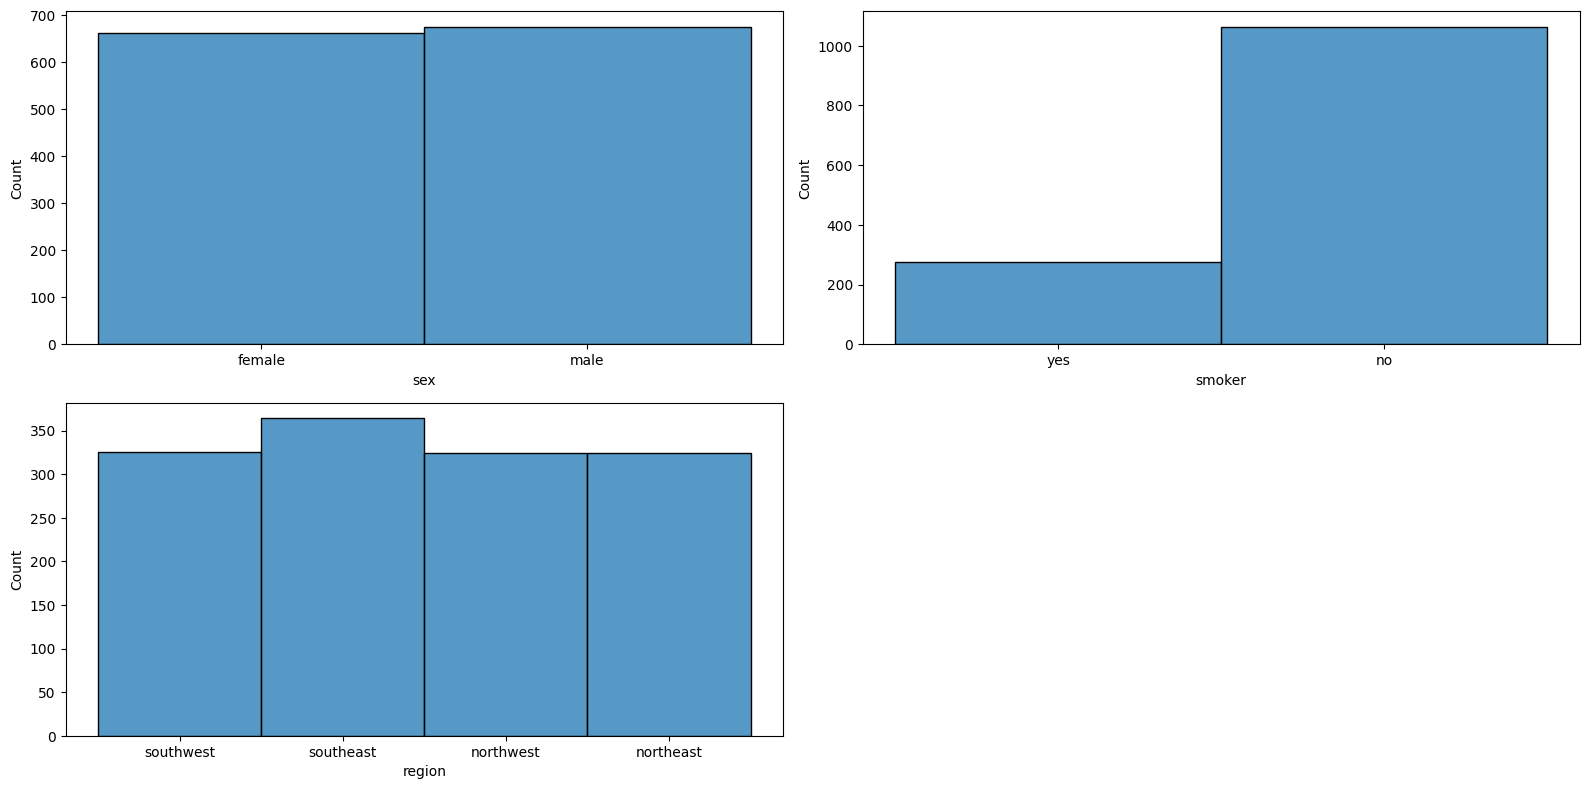

In [ ]:
fig, axis = plt.subplots(2, 2, figsize = (16, 8))

sns.histplot(ax = axis[0, 0], data = total_data, x = "sex")
sns.histplot(ax = axis[0, 1], data = total_data, x = "smoker")
sns.histplot(ax = axis[1, 0], data = total_data, x = "region")

fig.delaxes(axis[1, 1])

plt.tight_layout()

plt.show()

- `sex`: Hay muy ligeramente más hombres que mujeres
- `smoker`: Muy significativamente más no fumadores que fumadores
- `region`: Más cantidad en la región sudeste e igualado en el resto de regiones

### Numéricas
- `age`, `bmi`, `children`, `charges`

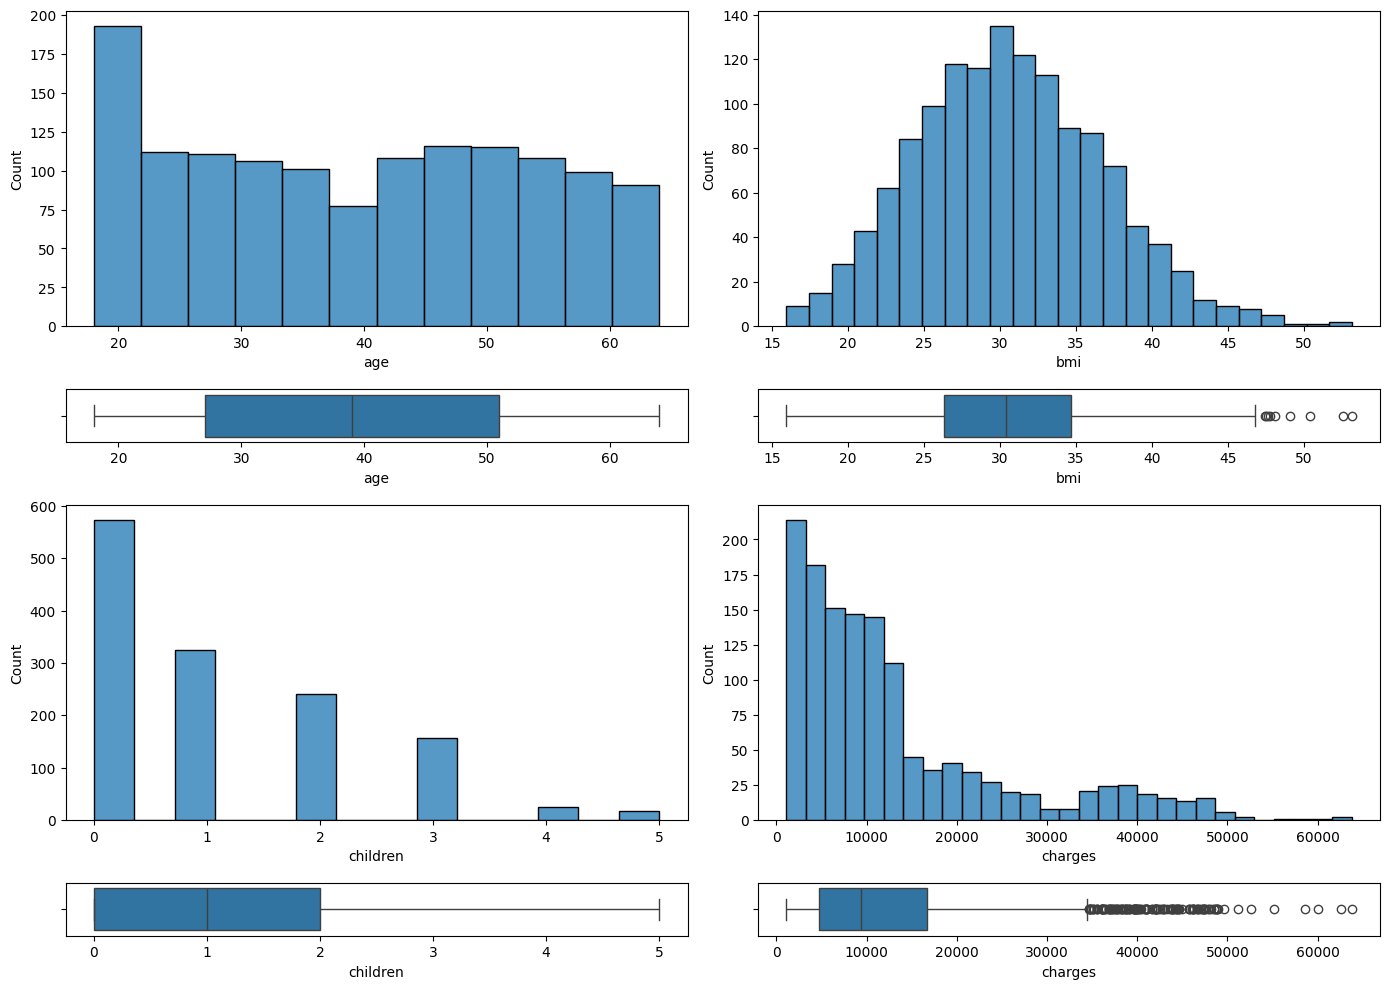

In [ ]:
fig, axis = plt.subplots(4, 2, figsize=(14, 10), gridspec_kw={"height_ratios": [6, 1] * 2})

sns.histplot(ax=axis[0, 0], data=total_data, x="age")
sns.boxplot(ax=axis[1, 0], data=total_data, x="age")

sns.histplot(ax=axis[0, 1], data=total_data, x="bmi")
sns.boxplot(ax=axis[1, 1], data=total_data, x="bmi")

sns.histplot(ax=axis[2, 0], data=total_data, x="children")
sns.boxplot(ax=axis[3, 0], data=total_data, x="children")

sns.histplot(ax=axis[2, 1], data=total_data, x="charges")
sns.boxplot(ax=axis[3, 1], data=total_data, x="charges")

plt.tight_layout()

plt.show()

- `age`: el rango de edad más habitual es entre los 27 y los 52 años. Sin embargo, la edad más habitual es 20 años. No tiene mucha dispersión.
- `bmi`: rango habitual ente 26 y 34, siendo 30 el más habitual. tiene cierta dispersión
- `children`: lo más habitual es no tener niños, el rango más frecuente es de 0 a 2
- `charges`: lo más habitual está cercano a 0. Bastante dispersión

## Análisis de variables multivariante

### Numérico - numérico

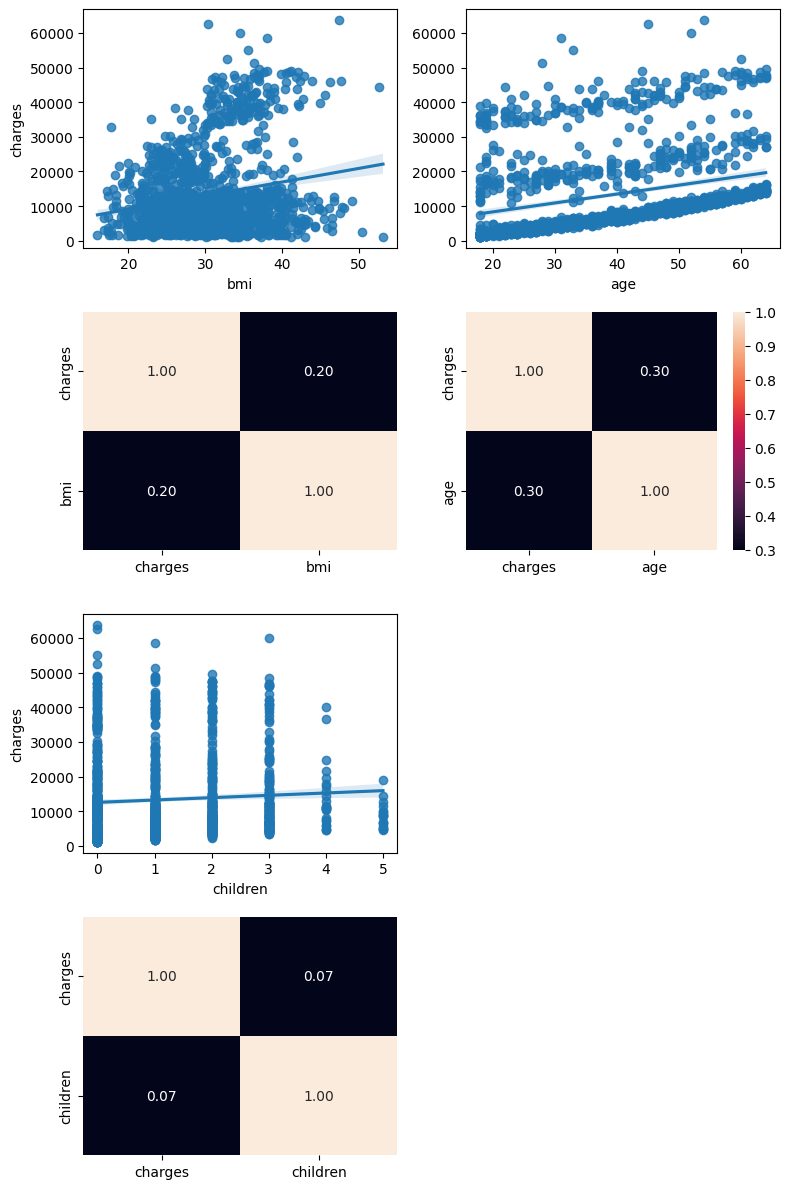

In [ ]:
fig, axis = plt.subplots(4, 2, figsize = (8, 12))

sns.regplot(ax = axis[0, 0], data = total_data, x = "bmi", y = "charges")
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "age", y = "charges").set(ylabel=None)
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[2, 0], data = total_data, x = "children", y = "charges")
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

plt.delaxes(axis[2,1])
plt.delaxes(axis[3,1])

plt.tight_layout()

plt.show()

- `age` - `charges`: a mayor edad normalmente más gastos. La que más correlación directa tiene
- `bmi` - `charges`: a mayor IMC más gastps. Correlación más débil que la anterior
- `children` - `charges`: no hay correlación directa entre estas 2 variables

#### `age` - `children`

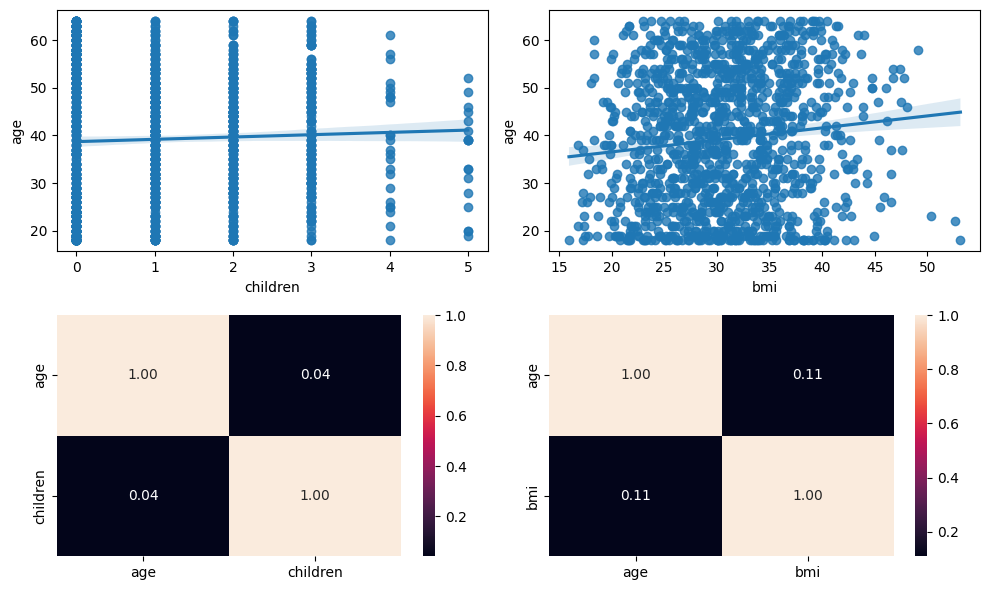

In [ ]:
fig, axis = plt.subplots(2, 2, figsize = (10, 6))

sns.regplot(ax = axis[0,0], data = total_data, x = "children", y = "age")
sns.heatmap(total_data[["age", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0])

sns.regplot(ax = axis[0,1], data = total_data, x = "bmi", y = "age")
sns.heatmap(total_data[["age", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1,1])

plt.tight_layout()

plt.show()

- No hay correlación de `age` con `children` ni con `bmi`

### Categórico - categórico

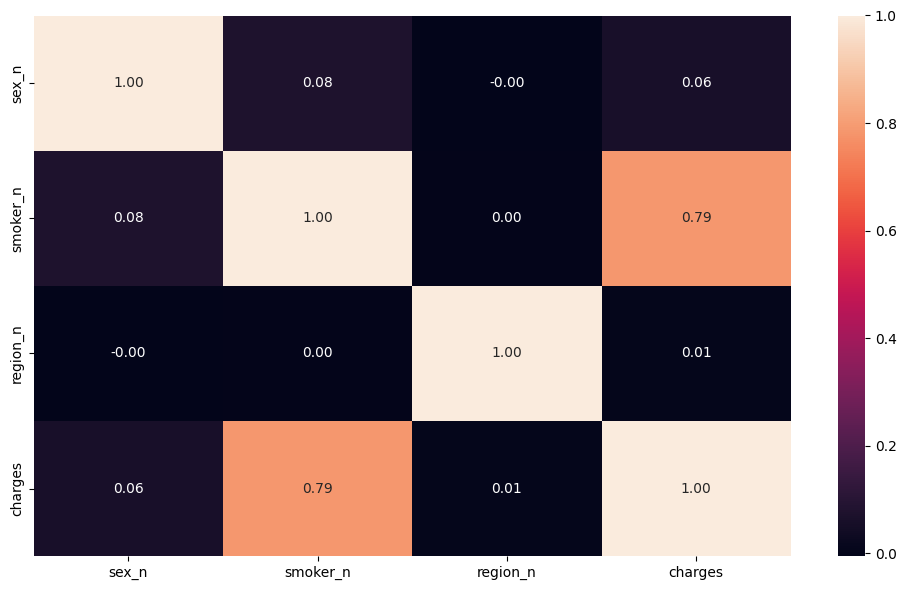

In [ ]:
total_data["sex_n"] = pd.factorize(total_data["sex"])[0]
total_data["smoker_n"] = total_data["smoker"].map({"yes": 1, "no": 0})
total_data["region_n"] = pd.factorize(total_data["region"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["sex_n", "smoker_n", "region_n", "charges"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()

plt.show()

- Correlación muy fuerte entre `smoker` y `charges`: Si es fumador pagará un precio más alto

In [39]:
columnas = [
    ("sex", "sex_n"),
    ("smoker", "smoker_n"),
    ("region", "region_n"),
]

transformation_rules = {}

for original_col, normalized_col in columnas:
    mapping = {
        row[original_col]: row[normalized_col]
        for _, row in total_data[[original_col, normalized_col]].drop_duplicates().iterrows()
    }
    transformation_rules[original_col] = mapping


with open("../models/transformation_rules.json", "w") as f:
    json.dump(transformation_rules, f, indent=4)

### Numérico - categórico

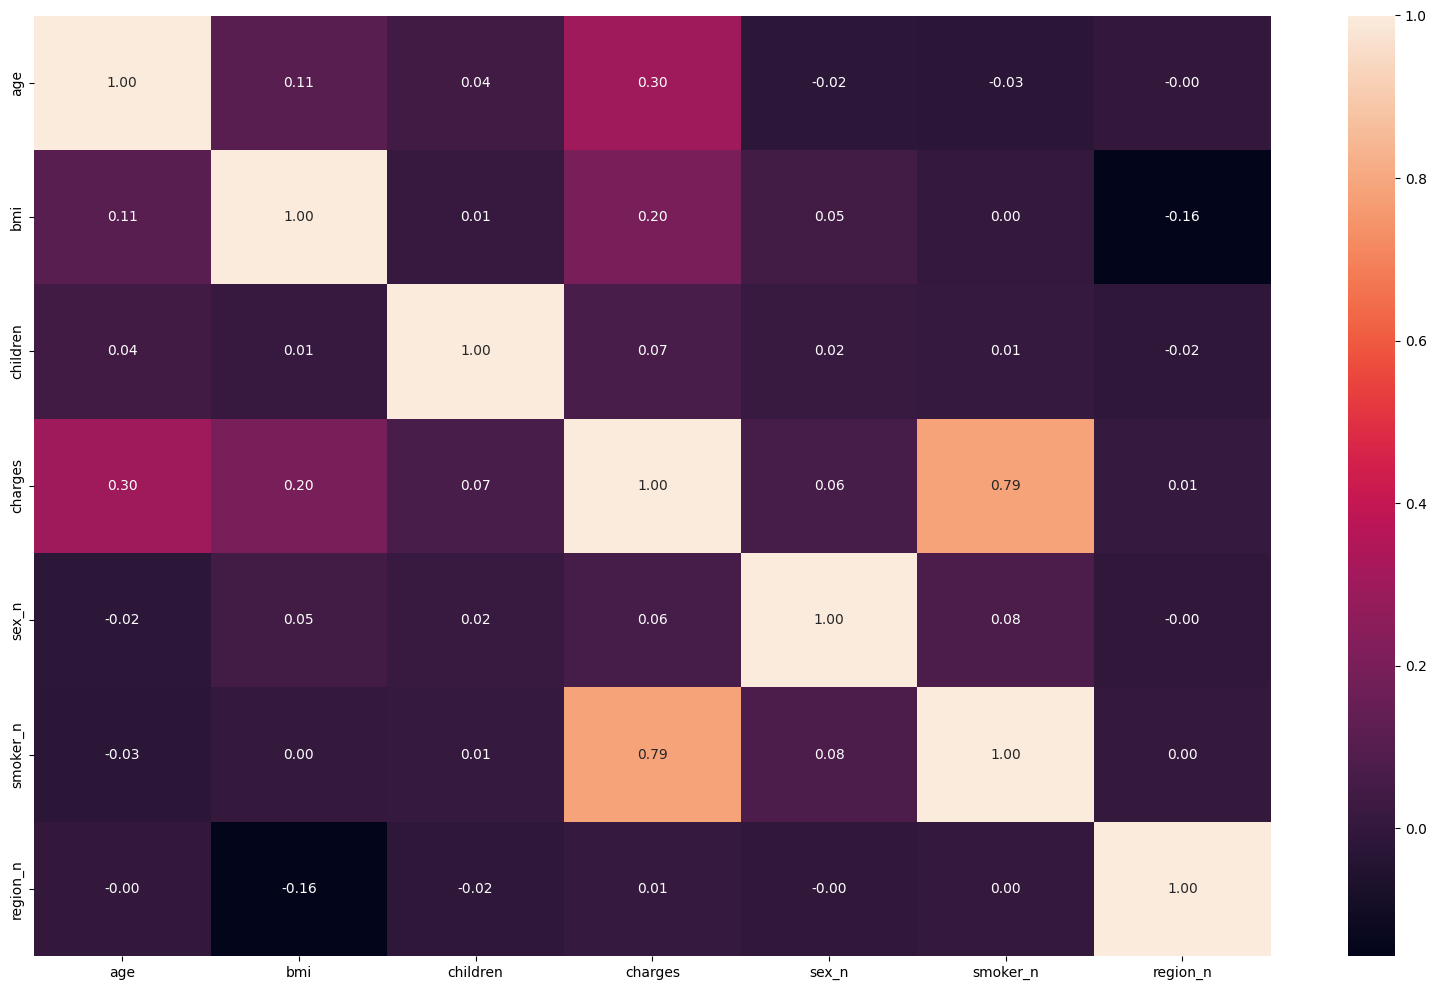

In [40]:
numericas_continuas = [
    "age", "bmi", "children", "charges"
]

categoricas_normalizadas = [
    "sex_n", "smoker_n", "region_n"
]

columnas_para_heatmap = numericas_continuas + categoricas_normalizadas

fig, axes = plt.subplots(figsize=(16, 10))

sns.heatmap(total_data[columnas_para_heatmap].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()


- Las conclusiones de correlación con la variables target son las mismas a las anteriores.
- Parece haber una débil correlación entre el IMC de la personas con la región

## Ingeniería de características

### Outliers

In [41]:
total_data.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.204936,1.483919
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,1.105208
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,0.000000,1.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,0.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,0.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


- Hay outliers pronunciados en todas las variables numéricas

In [42]:
total_data_con_outliers = total_data.copy()
total_data_sin_outliers = total_data.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr

  if lower_limit < 0:
    lower_limit = float(df[column].min())
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in numericas_continuas:
  total_data_sin_outliers, limits_list = replace_outliers_from_column(column, total_data_sin_outliers)
  outliers_dict[column] = limits_list

with open("../models/outliers_replacement.json", "w") as f:
    json.dump(outliers_dict, f)

In [43]:
total_data_con_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
 7   sex_n     1337 non-null   int64  
 8   smoker_n  1337 non-null   int64  
 9   region_n  1337 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 104.6+ KB


## Escalado de valores

In [44]:
num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n"]

X_con_outliers = total_data_con_outliers[num_variables]
X_sin_outliers = total_data_sin_outliers[num_variables]
y = total_data_con_outliers["charges"]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)


X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

### Normalización

In [45]:
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

with open("../models/normalizador_con_outliers.pkl", "wb") as file:
    pickle.dump(normalizador_con_outliers,file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

X_train_con_outliers_norm.to_excel("../data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index = False)

normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
    pickle.dump(normalizador_sin_outliers,file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

X_train_sin_outliers_norm.to_excel("../data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("../data/processed/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

,age,bmi,children,sex_n,smoker_n,region_n
1113,-1.157680,-0.996928,-0.907908,0.971409,-0.500292,1.383946
967,-1.300619,-0.792762,0.766904,0.971409,-0.500292,1.383946
598,0.914926,1.154664,0.766904,-1.029432,-0.500292,0.477983
170,1.701087,1.806837,-0.907908,0.971409,-0.500292,-0.427981
275,0.557580,-0.651417,0.766904,-1.029432,-0.500292,1.383946


### Min-max

In [46]:
min_max_con_outliers = MinMaxScaler()
min_max_con_outliers.fit(X_train_con_outliers)

with open("../models/min_max_con_outliers.pkl", "wb") as file:
    pickle.dump(min_max_con_outliers,file)

X_train_con_outliers_scal = min_max_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = min_max_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

X_train_con_outliers_scal.to_excel("../data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel("../data/processed/X_test_con_outliers_scal.xlsx", index = False)

min_max_sin_outliers = MinMaxScaler()
min_max_sin_outliers.fit(X_train_sin_outliers)

with open("../models/min_max_sin_outliers.pkl", "wb") as file:
    pickle.dump(min_max_sin_outliers,file)

X_train_sin_outliers_scal = min_max_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = min_max_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

X_train_sin_outliers_scal.to_excel("../data/processed/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("../data/processed/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n
1113,0.108696,0.230024,0.0,1.0,0.0,1.000000
967,0.065217,0.263250,0.4,1.0,0.0,1.000000
598,0.739130,0.580172,0.4,0.0,0.0,0.666667
170,0.978261,0.686306,0.0,1.0,0.0,0.333333
275,0.630435,0.286252,0.4,0.0,0.0,1.000000


## Selección de características

In [47]:
selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train_con_outliers_scal, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers_scal), columns = X_train_con_outliers_scal.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers_scal), columns = X_test_con_outliers_scal.columns.values[ix])

with open("../models/feature_selection_k_4.json", "w") as f:
    json.dump(X_train_sel.columns.tolist(), f)

X_train_sel.head()


,age,bmi,children,smoker_n
0,0.108696,0.230024,0.0,0.0
1,0.065217,0.263250,0.4,0.0
2,0.739130,0.580172,0.4,0.0
3,0.978261,0.686306,0.0,0.0
4,0.630435,0.286252,0.4,0.0


In [48]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values

X_train_sel.to_csv("../data/processed/clean_train.csv", index=False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index=False)